<a href="https://colab.research.google.com/github/Niranjan-Kumar2001/cat-dog-classification/blob/main/cat%20vs%20dog%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import zipfile
from tensorflow.keras.optimizers import RMSprop

local_zip='/content/train.zip'
ref_zip=zipfile.ZipFile(local_zip,'r')
ref_zip.extractall('/content/')
ref_zip.close()

local_zip='/content/validation.zip'
ref_zip=zipfile.ZipFile(local_zip,'r')
ref_zip.extractall('/content/')
ref_zip.close()

In [2]:
train_dir=os.path.join('/content/train')
validation_dir=os.path.join('/content/validation')
train_cat_dir=os.path.join('/content/train/cats')
train_dog_dir=os.path.join('/content/train/dogs')
valid_cat_dir=os.path.join('/content/validation/cats')
valid_dog_dir=os.path.join('/content/validation/dogs')
print('Total train cat images',len(os.listdir(train_cat_dir)))
print('Total train dog images',len(os.listdir(train_dog_dir)))
print('Total test  cat images',len(os.listdir(valid_cat_dir)))
print('total test dog images',len(os.listdir(valid_dog_dir)))

cat_file=os.listdir(train_cat_dir)
print(cat_file[:10])
dog_file=os.listdir(train_dog_dir)
print(dog_file[:10])

Total train cat images 1000
Total train dog images 1000
Total test  cat images 500
total test dog images 500
['cat.201.jpg', 'cat.729.jpg', 'cat.775.jpg', 'cat.156.jpg', 'cat.222.jpg', 'cat.227.jpg', 'cat.498.jpg', 'cat.308.jpg', 'cat.839.jpg', 'cat.800.jpg']
['dog.820.jpg', 'dog.770.jpg', 'dog.329.jpg', 'dog.822.jpg', 'dog.838.jpg', 'dog.920.jpg', 'dog.466.jpg', 'dog.441.jpg', 'dog.134.jpg', 'dog.231.jpg']


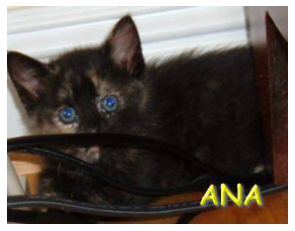

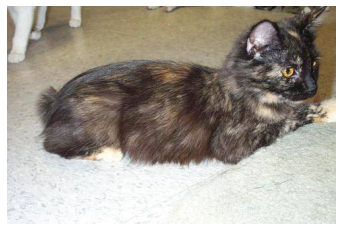

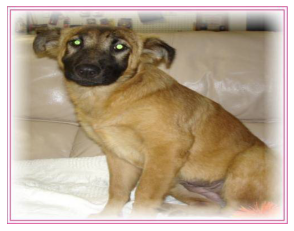

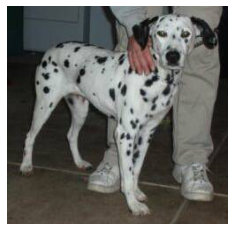

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
pic_i=2

n_cat=[os.path.join(train_cat_dir,fname)
for fname in cat_file[pic_i-2:pic_i]]
n_dog=[os.path.join(train_dog_dir,fname)
for fname in dog_file[pic_i-2:pic_i]]

for i,img_path in enumerate(n_cat+n_dog):
  img=mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [4]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen=ImageDataGenerator(rescale=1/255)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=64,
    class_mode='binary'
)
validation_generator=valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=64,
    class_mode='binary'
)

model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])
history=model.fit(train_generator,epochs=30,verbose=1,steps_per_epoch=25,validation_data=validation_generator)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
25/25 [==============================] - 55s 2s/step - loss: 0.9381 - accuracy: 0.5275 - val_loss: 0.7092 - val_accuracy: 0.5060
Epoch 2/30
25/25 [==============================] - 52s 2s/step - loss: 0.6922 - accuracy: 0.5496 - val_loss: 0.7337 - val_accuracy: 0.5090
Epoch 3/30
25/25 [==============================] - 52s 2s/step - loss: 0.6758 - accuracy: 0.5934 - val_loss: 0.6267 - val_accuracy: 0.6300
Epoch 4/30
25/25 [==============================] - 52s 2s/step - loss: 0.6681 - accuracy: 0.6018 - val_loss: 0.6493 - val_accuracy: 0.6790
Epoch 5/30
25/25 [==============================] - 53s 2s/step - loss: 0.6722 - accuracy: 0.6237 - val_loss: 0.6364 - val_accuracy: 0.6490
Epoch 6/30
25/25 [==============================] - 53s 2s/step - loss: 0.6398 - accuracy: 0.6366 - val_loss: 0.6032 - val_accuracy: 0.6630
Epoch 7/30
25/25 [==============================] - 52s 2s/step - loss: 0.6234 - accuracy: 0.6598 - val_loss: 0.5781 - val_accuracy: 0.6870
Epoch 8/30
25/25 [==

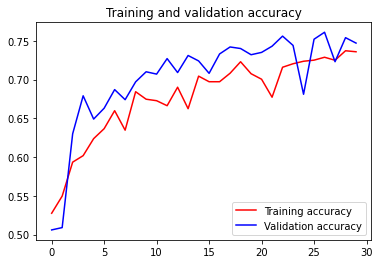

<Figure size 432x288 with 0 Axes>

In [5]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [10]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==1:
    print('cat')
  if classes==0:
    print('dog')  
 

Saving IMG_3280.JPG to IMG_3280.JPG
Saving IMG_3281.JPG to IMG_3281.JPG
Saving IMG_3282.JPG to IMG_3282.JPG
Saving IMG_3283.JPG to IMG_3283.JPG
Saving IMG_3284.JPG to IMG_3284.JPG
IMG_3280.JPG
cat
IMG_3281.JPG
cat
IMG_3282.JPG
cat
IMG_3283.JPG
dog
IMG_3284.JPG
dog
